In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
df = pd.read_csv('reddit_mental_health_posts.csv')

In [3]:
df.head()

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,HotConversation1273,A few months ago I was accepted into this full...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.0,https://www.reddit.com/r/ADHD/comments/rmbjwb/...
1,snorefestt,"Hey guys, I was curious if anyone else has the...",2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.0,https://www.reddit.com/r/ADHD/comments/rmbd1y/...
2,etyf12,\n\ni have 6 exams in the next 2 weeks one of...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.0,https://www.reddit.com/r/ADHD/comments/rmbbvu/...
3,GetHairOrDieTryin,Is there anyone out there that is struggling w...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.0,https://www.reddit.com/r/ADHD/comments/rmba1t/...
4,ZeroTransPat,"Whenever I get hungry, I never eat because I d...",2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.0,https://www.reddit.com/r/ADHD/comments/rmb8lm/...


In [4]:
# Fonction de nettoyage du texte
def clean_text(text):
    if isinstance(text, str):  # Vérifie si la valeur est une chaîne de caractères
        # Convertir en minuscules
        text = text.lower()

        # Supprimer les balises HTML (si présentes) et les liens URL
        text = re.sub(r'http\S+', '', text)
        text = re.sub('<.*?>', '', text)

        # Supprimer la ponctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Supprimer les stopwords
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        text = ' '.join(word for word in tokens if word not in stop_words)
        
        return text
    else:
        return ''  # Remplace les valeurs non définies par une chaîne vide

In [5]:
df['body'] = df['body'].apply(clean_text)

In [6]:
df.head()

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,HotConversation1273,months ago accepted full time software enginee...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.0,https://www.reddit.com/r/ADHD/comments/rmbjwb/...
1,snorefestt,hey guys curious anyone else issue apartment f...,2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.0,https://www.reddit.com/r/ADHD/comments/rmbd1y/...
2,etyf12,6 exams next 2 weeks one monday havent studied...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.0,https://www.reddit.com/r/ADHD/comments/rmbbvu/...
3,GetHairOrDieTryin,anyone struggling addadhd ’ interesting chatti...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.0,https://www.reddit.com/r/ADHD/comments/rmba1t/...
4,ZeroTransPat,whenever get hungry never eat dont know eat en...,2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.0,https://www.reddit.com/r/ADHD/comments/rmb8lm/...


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151288 entries, 0 to 151287
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        151288 non-null  object 
 1   body          151288 non-null  object 
 2   created_utc   151288 non-null  object 
 3   id            151288 non-null  object 
 4   num_comments  151288 non-null  int64  
 5   score         151288 non-null  int64  
 6   subreddit     151288 non-null  object 
 7   title         151288 non-null  object 
 8   upvote_ratio  151288 non-null  float64
 9   url           151288 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 11.5+ MB


In [8]:
import matplotlib.pyplot as plt

In [9]:
df['score'] = df['score'].astype(int)

In [10]:
#Classification des rating
df = df[df['score'] != 6]
df['sentiment'] = df['score'].apply(lambda rating : +1 if rating > 6 else 0)

In [11]:
df['sentiment'].value_counts()

0    113062
1     33170
Name: sentiment, dtype: int64

In [12]:
cnt1 = len(df[df['sentiment'] == 1])  # Compter le nombre de lignes avec sentiment positif
cnt0 = len(df[df['sentiment'] == 0])  # Compter le nombre de lignes avec sentiment neutre

# Calcul des pourcentages
pct0 = cnt0 / (cnt1 + cnt0)  # Pourcentage de lignes avec sentiment neutre
pct1 = cnt1 / (cnt0 + cnt1)  # Pourcentage de lignes avec sentiment positif

# Affichage des pourcentages
print('Pourcentage de sentiment neutre : ', round(pct0 * 100, 2), '%')
print('Pourcentage de sentiment positif : ', round(pct1 * 100, 2), '%')

Pourcentage de sentiment neutre :  77.32 %
Pourcentage de sentiment positif :  22.68 %


In [13]:
def word_count(sentence):
    return len(sentence.split())

df['word_count'] = df['body'].apply(word_count)
df.head(10)

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url,sentiment,word_count
0,HotConversation1273,months ago accepted full time software enginee...,2021-12-22T18:32:56.000Z,rmbjwb,1,1,ADHD,I get extremely anxious if I’m not working 24/7,1.0,https://www.reddit.com/r/ADHD/comments/rmbjwb/...,0,91
1,snorefestt,hey guys curious anyone else issue apartment f...,2021-12-22T18:24:25.000Z,rmbd1y,3,5,ADHD,"I can't will myself to clean my own house, but...",1.0,https://www.reddit.com/r/ADHD/comments/rmbd1y/...,0,78
2,etyf12,6 exams next 2 weeks one monday havent studied...,2021-12-22T18:22:52.000Z,rmbbvu,1,2,ADHD,i need some help,1.0,https://www.reddit.com/r/ADHD/comments/rmbbvu/...,0,31
3,GetHairOrDieTryin,anyone struggling addadhd ’ interesting chatti...,2021-12-22T18:20:35.000Z,rmba1t,3,2,ADHD,Anyone up for a chat?,1.0,https://www.reddit.com/r/ADHD/comments/rmba1t/...,0,40
4,ZeroTransPat,whenever get hungry never eat dont know eat en...,2021-12-22T18:18:47.000Z,rmb8lm,2,1,ADHD,Figuring out what to eat sucks,1.0,https://www.reddit.com/r/ADHD/comments/rmb8lm/...,0,40
5,[deleted],removed,2021-12-22T18:18:19.000Z,rmb88p,1,1,ADHD,Watching movies at x1.5 playback speed,1.0,https://www.reddit.com/r/ADHD/comments/rmb88p/...,0,1
6,Used_Inspection2618,’ 20 mg lexapro 50 mg vyvanse wondering anyone...,2021-12-22T18:15:52.000Z,rmb6f2,4,1,ADHD,Drinking while on meds?,1.0,https://www.reddit.com/r/ADHD/comments/rmb6f2/...,0,27
7,TheToastyToad,ive recently big lifestyle change new job part...,2021-12-22T18:13:15.000Z,rmb47u,1,2,ADHD,Using Christmas to take a break,1.0,https://www.reddit.com/r/ADHD/comments/rmb47u/...,0,102
8,Field-cave1519,im newly diagnosed 42 yr old female started ad...,2021-12-22T18:11:07.000Z,rmb2i8,1,1,ADHD,Does everyone get the euphoria feeling when th...,1.0,https://www.reddit.com/r/ADHD/comments/rmb2i8/...,0,131
9,Away_Entertainment29,tldr rough time titrating concerta last two mo...,2021-12-22T18:09:50.000Z,rmb1ib,1,1,ADHD,Xaggatin: zoned out and angry,1.0,https://www.reddit.com/r/ADHD/comments/rmb1ib/...,0,223


In [14]:
#pip install wordcloud --upgrade pip

In [15]:
#with open('texte_nettoye.txt', 'w', encoding='utf-8') as file:
   # file.write(all_text)

NameError: name 'all_text' is not defined

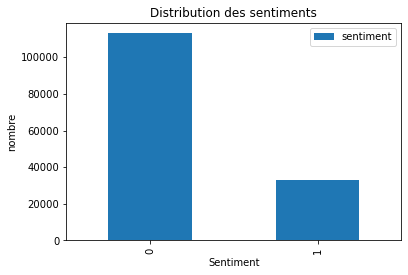

In [16]:
pd.value_counts(df['sentiment']).plot.bar() #diagramme en batton
plt.title('Distribution des sentiments')
plt.xlabel('Sentiment')
plt.ylabel('nombre')
plt.legend()
plt.show()

In [ ]:
#pip install --upgrade wordcloud

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
!pip install wordcloud

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [19]:
pip install --upgrade pillow

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


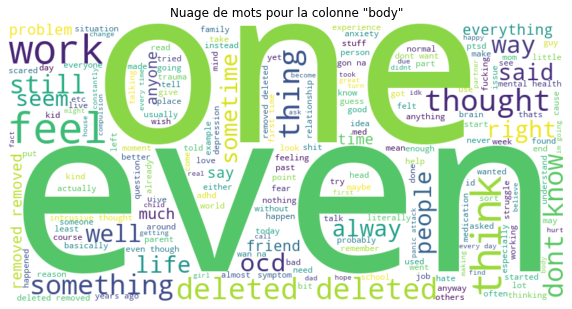

In [20]:
# Concaténer tous les textes de la colonne 'body' en une seule chaîne
all_text = ' '.join(text for text in df['body'] if isinstance(text, str))

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots pour la colonne "body"')
plt.show()

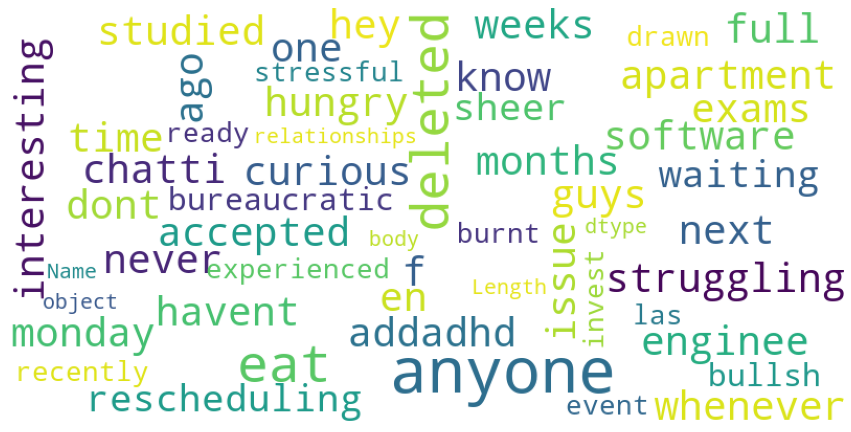

In [22]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(df['body'])

In [23]:
normal_words =' '.join([str(text) for text in df['body'][df['sentiment'] == 1]])

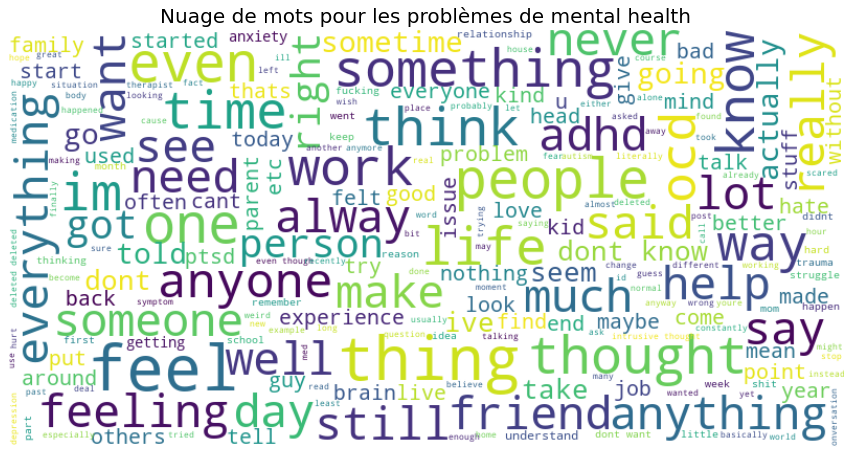

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Obtenir les mots pour les sentiments positifs
positive_words = ' '.join([str(text) for text in df['body'][df['sentiment'] == 1]])

# Définition des stopwords (mots à ignorer dans le nuage de mots)
stopwords = set(STOPWORDS)

def generate_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5
    ).generate(str(data))

    plt.figure(figsize=(15, 15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20)
    plt.show()

# Générer le nuage de mots pour les mots associés aux sentiments positifs
generate_wordcloud(positive_words, title='Nuage de mots pour les problèmes de mental health')

In [27]:
X = df['body']
y = df['sentiment']

In [28]:
#phase trainingTestSplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=224)


from sklearn.feature_extraction.text import CountVectorizer
# Initialisation du CountVectorizer pour convertir les données textuelles en vecteurs numériques
cv = CountVectorizer()
# Transformation des textes d'entraînement en vecteurs numériques
ctmTr = cv.fit_transform(X_train)
# Transformation des textes de test en vecteurs numériques à l'aide du CountVectorizer déjà ajusté
X_test_dtm = cv.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
# Initialisation du classificateur KNN avec 5 voisins
knn = KNeighborsClassifier(n_neighbors=5)
# Entraînement du modèle KNN avec les données d'entraînement transformées
knn.fit(ctmTr, y_train)
# Prédictions sur les données de test à l'aide du modèle entraîné
y_pred_knn= knn.predict(X_test_dtm)
# Calcul du score
knn_score = knn.score(X_test_dtm, y_test)
print("Resultat de KNN Classifier avec CountVectorizer")
#Score de précision
print(knn_score,"%")

Resultat de KNN Classifier avec CountVectorizer
0.7305903806701618 %


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=24)

from sklearn.feature_extraction.text import CountVectorizer

#Vectorizing the text data
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

from sklearn import svm
#Training the model
svcl = svm.SVC()
svcl.fit(ctmTr, y_train)
y_pred_svm = svcl.predict(X_test_dtm)
#Phase de test
svcl_score = svcl.score(X_test_dtm, y_test)
print("Resultat de SVM avec CountVectorizer")

#Score de précision
print(svcl_score,"%")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size = 0.3, random_state=50)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#Vectorizing the text data
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn.linear_model import LogisticRegression
#Training the model
lr = LogisticRegression()
lr.fit(ctmTr, y_train)
y_pred_lr = lr.predict(X_test_dtm)
#Accuracy score
lr_score = lr.score(X_test_dtm, y_test)
print("Resultat de Logistic Regression avec CountVectorizer : ")
#Score de précision
print(lr_score,"%")